In [2]:
import pandas as pd 

data1 = pd.read_csv('H-S_seq_1.csv', header=0, parse_dates=['Date'])
data1.rename(columns = {'Date':'ds','S':'y'},inplace=True)
data1

,No.,ds,H,y
0,1,2021-08-06,0.000,0.000
1,2,2021-08-31,0.620,7.936
2,3,2021-09-03,0.620,8.184
3,4,2021-09-07,0.620,11.408
4,5,2021-09-10,0.620,11.904
...,...,...,...,...
57,58,2022-05-17,4.464,54.932
58,59,2022-05-20,4.464,54.932
59,60,2022-05-23,4.464,54.932
60,61,2022-05-27,4.464,54.932


In [6]:
data1['cap']=55

In [7]:
from prophet import Prophet

m = Prophet(yearly_seasonality=False,weekly_seasonality=False,daily_seasonality=False,growth='logistic')
m.add_regressor('H')
m.fit(data1)

future = m.make_future_dataframe(periods=10)
future['H'] = data1['H']
future['cap'] = 55
future.fillna(method='ffill',inplace=True)
future.tail(15)


10:11:39 - cmdstanpy - INFO - Chain [1] start processing
10:11:39 - cmdstanpy - INFO - Chain [1] done processing


,ds,H,cap
57,2022-05-17,4.464,55
58,2022-05-20,4.464,55
59,2022-05-23,4.464,55
60,2022-05-27,4.464,55
61,2022-05-30,4.464,55
62,2022-05-31,4.464,55
63,2022-06-01,4.464,55
64,2022-06-02,4.464,55
65,2022-06-03,4.464,55
66,2022-06-04,4.464,55


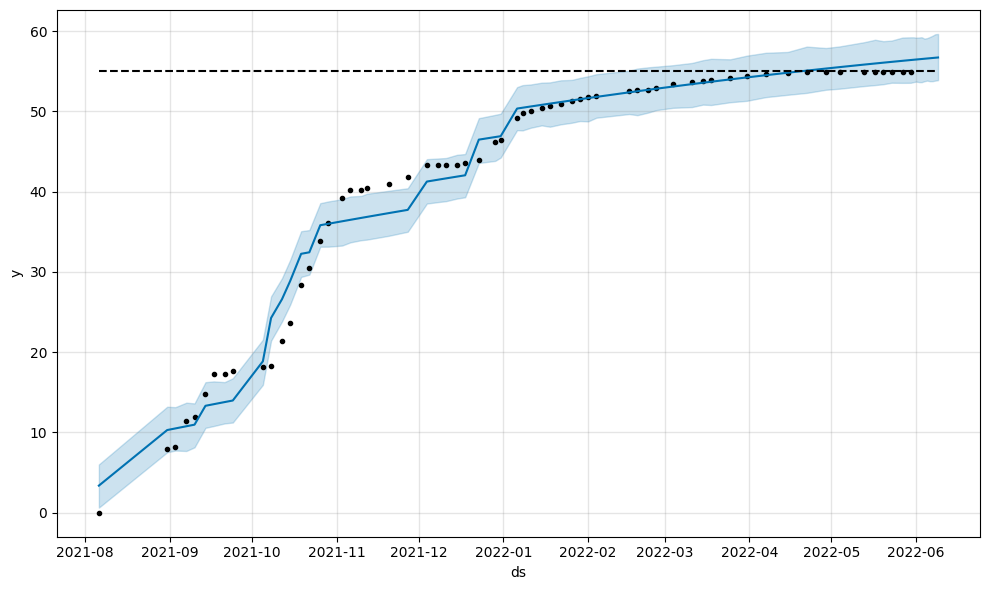

In [8]:
forecast = m.predict(future)
fig = m.plot(forecast)
# m.plot_components(forecast)

In [9]:
forecast

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,H,H_lower,H_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-06,32.405815,55,0.642016,6.019899,32.405815,32.405815,-29.024503,-29.024503,-29.024503,-29.024503,-29.024503,-29.024503,-29.024503,-29.024503,-29.024503,0.0,0.0,0.0,3.381313
1,2021-08-31,34.118184,55,7.535103,13.204000,34.118184,34.118184,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,0.0,0.0,0.0,10.303638
2,2021-09-03,34.320352,55,7.751089,13.153506,34.320352,34.320352,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,0.0,0.0,0.0,10.505806
3,2021-09-07,34.588689,55,7.693823,13.711741,34.588689,34.588689,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,0.0,0.0,0.0,10.774144
4,2021-09-10,34.789001,55,8.152766,13.621830,34.789001,34.789001,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,-23.814545,0.0,0.0,0.0,10.974455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2022-06-05,48.089059,55,53.820375,59.115891,48.089059,48.089059,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,0.0,0.0,0.0,56.576247
68,2022-06-06,48.120492,55,53.752020,59.255541,48.120492,48.120492,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,0.0,0.0,0.0,56.607680
69,2022-06-07,48.151803,55,53.752278,59.411012,48.151803,48.151803,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,0.0,0.0,0.0,56.638991
70,2022-06-08,48.182992,55,53.823345,59.601159,48.182992,48.182992,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,8.487188,0.0,0.0,0.0,56.670180


In [10]:
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

with open('serialized_model.json', 'r') as fin:
    m = model_from_json(fin.read())  # Load model
